In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from src.models.synthesis.evaluate_models import SynthesisAnalysis
from src.models.synthesis.train_models import SynthesisTraining
from src.utils.constants import K_FOLDS
from src.visualization.styles.formatting import errorbar_kwargs

In [2]:
st = SynthesisTraining()
sa = SynthesisAnalysis()

results = st.load_training_models()
indices = sa.load_performance_indices()

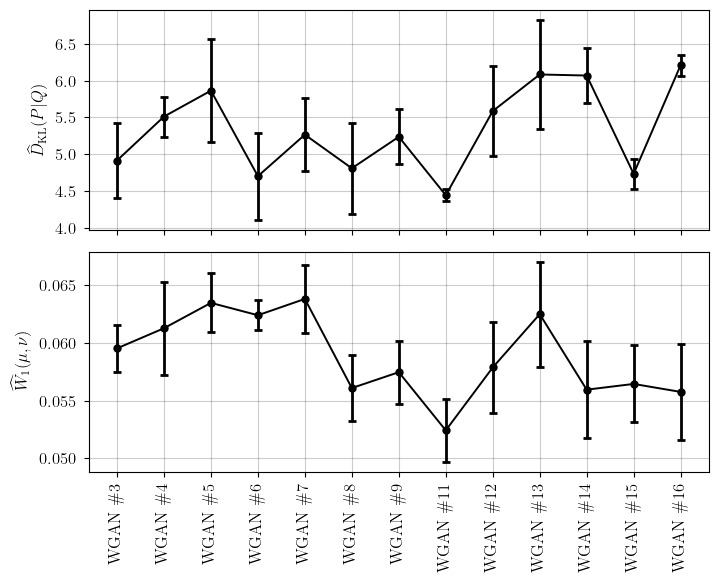

In [4]:
indexes = [3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]

n_folds = K_FOLDS
kl_divergence = indices["kl_divergence"]
wasserstein_dist = indices["wasserstein_distance"]
models = [model["model_name"].replace("#", "\#") for i, model in enumerate(results["outputs"]) if i in indexes]

x = np.arange(len(models))
y = np.mean(kl_divergence, axis=0)
yerr = np.std(kl_divergence, axis=0) / np.sqrt(n_folds - 1)

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
axs[0].errorbar(x=x, y=y[indexes], yerr=yerr[indexes], **errorbar_kwargs)
axs[0].grid(True)
axs[0].set_ylabel(r"$\widehat{D}_{\mathrm{KL}}(P|Q)$")
# axs[0].set_ylabel("KL Divergence")

y = np.mean(wasserstein_dist, axis=0)
yerr = np.std(wasserstein_dist, axis=0) / np.sqrt(n_folds - 1)

axs[1].errorbar(x=x, y=y[indexes], yerr=yerr[indexes], **errorbar_kwargs)
axs[1].grid(True)
axs[1].set_ylabel(r"$\widehat{W}_{1}(\mu,\nu)$")
# axs[1].set_ylabel("Wasserstein Distance")
axs[1].set_xticks(x, models, rotation=90, ha="center")

f.subplots_adjust(hspace=0.1)
f.savefig(os.path.join("data", "images", "kldiv_wasserstein_errorbar_plot_alt.png"), dpi=600, bbox_inches="tight")
plt.show()